<a href="https://colab.research.google.com/github/ahlemtbini/Application-web-d-evaluation-des-employers-et-gestions-des-contrats/blob/main/Copie_de_Copie_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **partie analyse des données**

In [ ]:
import pandas as pd 
data=pd.read_csv("/content/drive/MyDrive/GlobalLandTemperaturesByCity.csv")
print("Data Info")
data.info()

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [ ]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
data.shape

(8599212, 7)

In [ ]:
data.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [ ]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [ ]:
data['Country'].value_counts()

India               1014906
China                827802
United States        687289
Brazil               475580
Russia               461234
                     ...   
Lesotho                1881
Djibouti               1797
Eritrea                1797
Oman                   1653
Papua New Guinea       1581
Name: Country, Length: 159, dtype: int64

In [ ]:
data[["Country","AverageTemperature"]].groupby(["Country"],as_index = False).mean().sort_values(by = "AverageTemperature",ascending = False).style.background_gradient("Greens")

,Country,AverageTemperature
40,Djibouti,29.152790
103,Niger,28.145552
133,Sudan,28.072831
20,Burkina Faso,27.815295
89,Mali,27.590491
27,Chad,27.189829
59,Guinea Bissau,27.057185
90,Mauritania,27.021905
14,Benin,26.975880
23,Cambodia,26.918136


In [ ]:
data[["Latitude","AverageTemperature"]].groupby(["Latitude"],as_index = False).mean().sort_values(by = "AverageTemperature",ascending = False).style.background_gradient("Greens")

,Latitude,AverageTemperature
6,13.66N,26.581943
10,16.87N,26.373235
2,10.45N,26.361831
4,12.05N,26.357957
71,8.84N,26.203001
55,5.63S,25.907971
69,7.23N,25.824842
14,2.41N,25.557798
70,7.23S,25.446569
8,15.27N,25.389592


In [ ]:
data[["Longitude","AverageTemperature"]].groupby(["Longitude"],as_index = False).mean().sort_values(by = "AverageTemperature",ascending = False).style.background_gradient("Greens")

,Longitude,AverageTemperature
645,42.74E,29.152790
521,32.50E,29.081291
397,2.48E,29.062560
608,4.17W,28.784449
517,32.20E,28.598226
1043,80.09E,28.417858
723,5.78E,28.280791
898,70.68W,28.259240
1056,80.83E,28.230024
571,37.13W,28.184501


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of AverageTemperature')

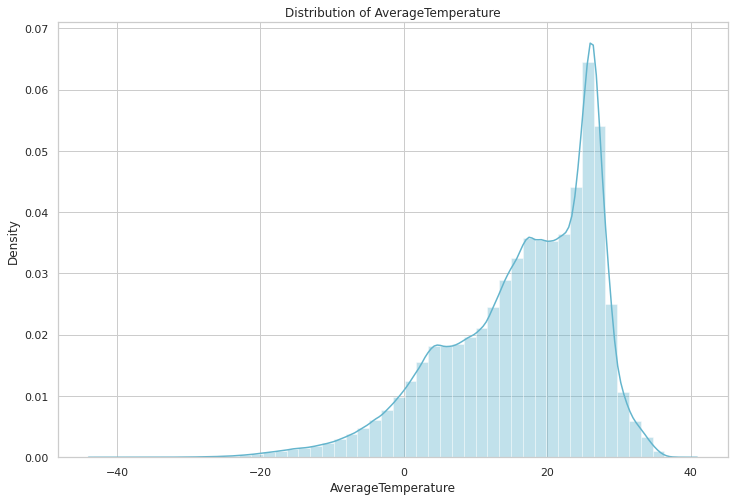

In [ ]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data['AverageTemperature'], kde = True, color = 'c')
plt.title('Distribution of AverageTemperature')

In [ ]:
#preparing data for modeling
#Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data.dt.drop_duplicates())
data.dt = label.transform(data.dt)
label.fit(data.Country.drop_duplicates())
data.Country = label.transform(data.Country)
label.fit(data.City.drop_duplicates())
data.City = label.transform(data.City)
label.fit(data.Latitude.drop_duplicates())
data.Latitude= label.transform(data.Latitude)
label.fit(data.Longitude.drop_duplicates())
data.Longitude= label.transform(data.Longitude)
data.dtypes

dt                                 int64
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                               int64
Country                            int64
Latitude                           int64
Longitude                          int64
dtype: object

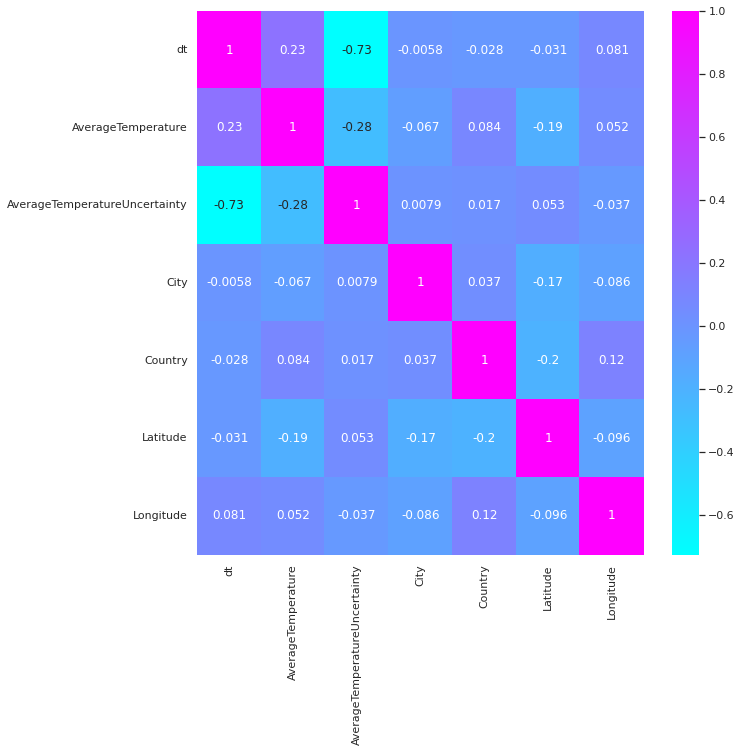

In [ ]:
#  correlation or dependence between features
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(data.corr(), annot=True, cmap='cool')



```
# Ce texte est au format code
```

# **regression lineaire**

In [ ]:
#split data
data.dropna(inplace=True)
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,0,6.068,1.737,3443,39,61,14
5,5,5.788,3.624,3443,39,61,14
6,6,10.644,1.283,3443,39,61,14
7,7,14.051,1.347,3443,39,61,14
8,8,16.082,1.396,3443,39,61,14


In [ ]:
Y = data.AverageTemperature
X = data.drop(["AverageTemperature","AverageTemperatureUncertainty","City","Latitude","Longitude"], axis = 1)
X.head()

,dt,Country
0,0,39
5,5,39
6,6,39
7,7,39
8,8,39


In [ ]:
Y.head()

0     6.068
5     5.788
6    10.644
7    14.051
8    16.082
Name: AverageTemperature, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [ ]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("Y_train shape {}, len {}.".format(y_train.shape,len(y_train)))
print("Y_test shape {}, len {}.".format(y_test.shape,len(y_test)))

X_train shape (44004, 2), len 44004.
X_test shape (21674, 2), len 21674.
Y_train shape (44004,), len 44004.
Y_test shape (21674,), len 21674.


In [ ]:
#We have defined the list in which we will save the model results for later comparison.
results = []

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
score = r2_score(y_test,predict)
results.append(score)

In [ ]:
print("r_square score --> ",score)
print('Mean Absolute Error -->', metrics.mean_absolute_error(y_test, predict))
print('Mean Squared Error -->', metrics.mean_squared_error(y_test, predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(y_test, predict)))

r_square score -->  0.037416274033877595
Mean Absolute Error --> 8.149514722913773
Mean Squared Error --> 103.17348274878917
Root Mean Squared Error --> 10.157434850826716


In [ ]:
df_linearRegression = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
df_linearRegression.head()

,Actual,Predicted
3886564,25.842,16.244473
5539509,4.159,18.228920
5848941,23.411,16.804863
7855437,16.124,16.605958
2818025,9.141,18.962269


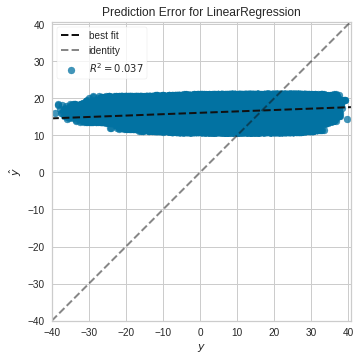

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show();

# **modele de prophet**

In [ ]:
import pandas as pd 
def parser(x):
    return pd.datetime.strptime(x, '%Y-%m-%d')
 
temperatures = pd.read_csv('/content/drive/MyDrive/GlobalLandTemperaturesByCity.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from fbprophet import Prophet

In [ ]:
temperatures.dropna(inplace=True)
resample = temperatures.resample('AS')
yearly = resample.mean()
subset = yearly.reset_index()[['dt', 'AverageTemperature']]
subset.rename(columns={"dt": "ds", "AverageTemperature": "y"}, inplace=True)
subset.head()

,ds,y
0,1743-01-01,4.882424
1,1744-01-01,10.734047
2,1745-01-01,1.497593
3,1746-01-01,NaN
4,1747-01-01,NaN


In [ ]:
pmodel = Prophet()
pmodel.fit(subset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:

future = pmodel.make_future_dataframe(periods=20, freq='12M')
forecast = pmodel.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1743-01-01,7.553530,6.208703,8.924894
1,1744-01-01,7.689292,6.244559,9.139360
2,1745-01-01,7.581170,6.014900,8.933537
3,1746-01-01,7.729414,6.451589,9.194485
4,1747-01-01,7.871459,6.448440,9.259226


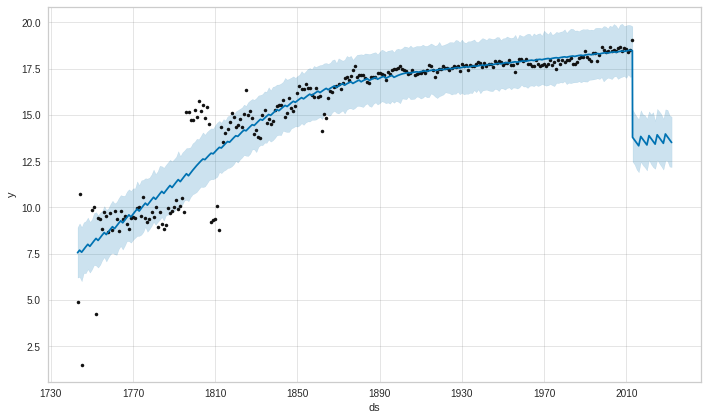

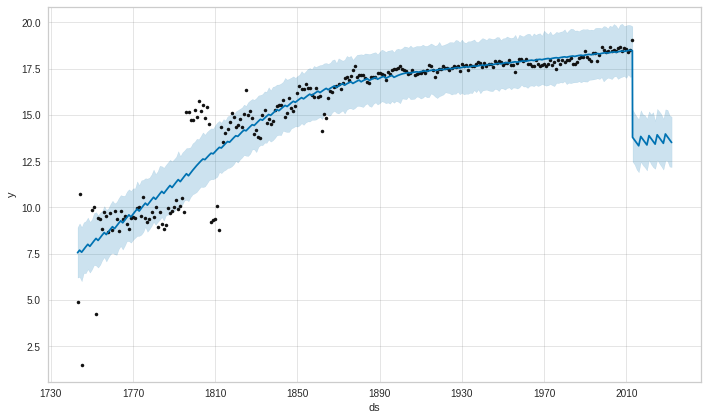

In [ ]:
pmodel.plot(forecast)


In [ ]:
print(forecast[forecast.ds == '2030-01-31'].iloc[0]['yhat'])

13.818305312658717


# Nouvelle section